# **DATA COLLECTION**

In [ ]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.8/669.8 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.9/247.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.4/393.4 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 3.4 MB/s eta 0:00:00


In [ ]:
import openmeteo_requests

import pandas as pd
import requests_cache
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://air-quality-api.open-meteo.com/v1/air-quality"
params = {
	"latitude": 24.8608,
	"longitude": 67.0104,
	"hourly": ["pm10", "pm2_5", "carbon_monoxide", "carbon_dioxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone", "aerosol_optical_depth", "dust", "uv_index", "uv_index_clear_sky", "ammonia", "methane", "alder_pollen", "birch_pollen", "grass_pollen", "mugwort_pollen", "olive_pollen", "ragweed_pollen"],
	"current": "us_aqi",
	"timezone": "auto",
	"past_days": 61,
	"forecast_days": 1,
	"domains": "cams_global"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Current values. The order of variables needs to be the same as requested.
current = response.Current()
current_us_aqi = current.Variables(0).Value()

print(f"Current time {current.Time()}")
print(f"Current us_aqi {current_us_aqi}")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_pm10 = hourly.Variables(0).ValuesAsNumpy()
hourly_pm2_5 = hourly.Variables(1).ValuesAsNumpy()
hourly_carbon_monoxide = hourly.Variables(2).ValuesAsNumpy()
hourly_carbon_dioxide = hourly.Variables(3).ValuesAsNumpy()
hourly_nitrogen_dioxide = hourly.Variables(4).ValuesAsNumpy()
hourly_sulphur_dioxide = hourly.Variables(5).ValuesAsNumpy()
hourly_ozone = hourly.Variables(6).ValuesAsNumpy()
hourly_aerosol_optical_depth = hourly.Variables(7).ValuesAsNumpy()
hourly_dust = hourly.Variables(8).ValuesAsNumpy()
hourly_uv_index = hourly.Variables(9).ValuesAsNumpy()
hourly_uv_index_clear_sky = hourly.Variables(10).ValuesAsNumpy()
hourly_ammonia = hourly.Variables(11).ValuesAsNumpy()
hourly_methane = hourly.Variables(12).ValuesAsNumpy()
hourly_alder_pollen = hourly.Variables(13).ValuesAsNumpy()
hourly_birch_pollen = hourly.Variables(14).ValuesAsNumpy()
hourly_grass_pollen = hourly.Variables(15).ValuesAsNumpy()
hourly_mugwort_pollen = hourly.Variables(16).ValuesAsNumpy()
hourly_olive_pollen = hourly.Variables(17).ValuesAsNumpy()
hourly_ragweed_pollen = hourly.Variables(18).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["pm10"] = hourly_pm10
hourly_data["pm2_5"] = hourly_pm2_5
hourly_data["carbon_monoxide"] = hourly_carbon_monoxide
hourly_data["carbon_dioxide"] = hourly_carbon_dioxide
hourly_data["nitrogen_dioxide"] = hourly_nitrogen_dioxide
hourly_data["sulphur_dioxide"] = hourly_sulphur_dioxide
hourly_data["ozone"] = hourly_ozone
hourly_data["aerosol_optical_depth"] = hourly_aerosol_optical_depth
hourly_data["dust"] = hourly_dust
hourly_data["uv_index"] = hourly_uv_index
hourly_data["uv_index_clear_sky"] = hourly_uv_index_clear_sky
hourly_data["ammonia"] = hourly_ammonia
hourly_data["methane"] = hourly_methane
hourly_data["alder_pollen"] = hourly_alder_pollen
hourly_data["birch_pollen"] = hourly_birch_pollen
hourly_data["grass_pollen"] = hourly_grass_pollen
hourly_data["mugwort_pollen"] = hourly_mugwort_pollen
hourly_data["olive_pollen"] = hourly_olive_pollen
hourly_data["ragweed_pollen"] = hourly_ragweed_pollen

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

Coordinates 24.900001525878906°N 67.0°E
Elevation 8.0 m asl
Timezone b'Asia/Karachi'b'GMT+5'
Timezone difference to GMT+0 18000 s
Current time 1752303600
Current us_aqi 80.62057495117188
                          date       pm10      pm2_5  carbon_monoxide  \
0    2025-05-11 19:00:00+00:00  85.400002  42.400002            210.0   
1    2025-05-11 20:00:00+00:00  84.300003  41.200001            189.0   
2    2025-05-11 21:00:00+00:00  83.800003  40.000000            175.0   
3    2025-05-11 22:00:00+00:00  82.000000  38.799999            169.0   
4    2025-05-11 23:00:00+00:00  80.300003  37.700001            169.0   
...                        ...        ...        ...              ...   
1483 2025-07-12 14:00:00+00:00  90.599998  27.100000            285.0   
1484 2025-07-12 15:00:00+00:00  70.300003  24.900000            280.0   
1485 2025-07-12 16:00:00+00:00  61.900002  24.200001            270.0   
1486 2025-07-12 17:00:00+00:00  58.000000  24.000000            255.0   
1487 2025-

In [ ]:
# Save to current working directory (in Colab's temporary storage)
hourly_dataframe.to_csv("my_data01.csv",index=False)  # index=False avoids saving row numbers
print("CSV saved successfully!")

CSV saved successfully!


# **DATA PREPROCESSING**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("my_data01.csv")

In [ ]:
df.head()

,date,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,aerosol_optical_depth,dust,uv_index,uv_index_clear_sky,ammonia,methane,alder_pollen,birch_pollen,grass_pollen,mugwort_pollen,olive_pollen,ragweed_pollen
0,2025-05-11 19:00:00+00:00,85.4,42.4,210.0,450.0,17.2,10.3,60.0,0.64,74.0,0.0,0.0,NaN,1405.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-05-11 20:00:00+00:00,84.3,41.2,189.0,449.0,14.3,9.6,64.0,0.61,75.0,0.0,0.0,NaN,1406.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-05-11 21:00:00+00:00,83.8,40.0,175.0,449.0,11.8,9.0,67.0,0.58,76.0,0.0,0.0,NaN,1409.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-05-11 22:00:00+00:00,82.0,38.8,169.0,450.0,10.2,8.1,68.0,0.57,74.0,0.0,0.0,NaN,1419.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-05-11 23:00:00+00:00,80.3,37.7,169.0,451.0,9.0,7.2,68.0,0.57,72.0,0.0,0.0,NaN,1431.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
date,0
pm10,0
pm2_5,0
carbon_monoxide,0
carbon_dioxide,0
nitrogen_dioxide,0
sulphur_dioxide,0
ozone,0
aerosol_optical_depth,0
dust,0


In [ ]:
df.drop(['ammonia','alder_pollen','birch_pollen','grass_pollen','mugwort_pollen','olive_pollen','ragweed_pollen'],axis=1,inplace=True)

In [ ]:
df

,date,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,aerosol_optical_depth,dust,uv_index,uv_index_clear_sky,methane
0,2025-05-11 19:00:00+00:00,85.4,42.4,210.0,450.0,17.2,10.3,60.0,0.64,74.0,0.0,0.0,1405.0
1,2025-05-11 20:00:00+00:00,84.3,41.2,189.0,449.0,14.3,9.6,64.0,0.61,75.0,0.0,0.0,1406.0
2,2025-05-11 21:00:00+00:00,83.8,40.0,175.0,449.0,11.8,9.0,67.0,0.58,76.0,0.0,0.0,1409.0
3,2025-05-11 22:00:00+00:00,82.0,38.8,169.0,450.0,10.2,8.1,68.0,0.57,74.0,0.0,0.0,1419.0
4,2025-05-11 23:00:00+00:00,80.3,37.7,169.0,451.0,9.0,7.2,68.0,0.57,72.0,0.0,0.0,1431.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,2025-07-12 14:00:00+00:00,90.6,27.1,285.0,442.0,17.3,15.0,50.0,1.44,89.0,0.0,0.0,1342.0
1484,2025-07-12 15:00:00+00:00,70.3,24.9,280.0,442.0,21.6,15.1,40.0,1.42,79.0,0.0,0.0,1344.0
1485,2025-07-12 16:00:00+00:00,61.9,24.2,270.0,442.0,23.9,14.7,35.0,1.38,70.0,0.0,0.0,1346.0
1486,2025-07-12 17:00:00+00:00,58.0,24.0,255.0,443.0,25.1,14.1,33.0,1.34,61.0,0.0,0.0,1348.0


In [ ]:
df.isnull().sum()

,0
date,0
pm10,0
pm2_5,0
carbon_monoxide,0
carbon_dioxide,0
nitrogen_dioxide,0
sulphur_dioxide,0
ozone,0
aerosol_optical_depth,0
dust,0


In [ ]:
df['index'] = range(len(df))

In [ ]:
df.columns

Index(['date', 'pm10', 'pm2_5', 'carbon_monoxide', 'carbon_dioxide',
       'nitrogen_dioxide', 'sulphur_dioxide', 'ozone', 'aerosol_optical_depth',
       'dust', 'uv_index', 'uv_index_clear_sky', 'methane', 'index'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
date,0
pm10,0
pm2_5,0
carbon_monoxide,0
carbon_dioxide,0
nitrogen_dioxide,0
sulphur_dioxide,0
ozone,0
aerosol_optical_depth,0
dust,0


In [ ]:
df.head()

,date,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,aerosol_optical_depth,dust,uv_index,uv_index_clear_sky,methane,index
0,2025-05-11 19:00:00+00:00,85.4,42.4,210.0,450.0,17.2,10.3,60.0,0.64,74.0,0.0,0.0,1405.0,0
1,2025-05-11 20:00:00+00:00,84.3,41.2,189.0,449.0,14.3,9.6,64.0,0.61,75.0,0.0,0.0,1406.0,1
2,2025-05-11 21:00:00+00:00,83.8,40.0,175.0,449.0,11.8,9.0,67.0,0.58,76.0,0.0,0.0,1409.0,2
3,2025-05-11 22:00:00+00:00,82.0,38.8,169.0,450.0,10.2,8.1,68.0,0.57,74.0,0.0,0.0,1419.0,3
4,2025-05-11 23:00:00+00:00,80.3,37.7,169.0,451.0,9.0,7.2,68.0,0.57,72.0,0.0,0.0,1431.0,4


In [ ]:
df['index'].count()

np.int64(1488)

In [ ]:
import pandas as pd
import numpy as np

def calculate_pm25_aqi(pm25):
    """Calculate AQI based on PM2.5 concentration"""
    if pm25 <= 12.0:
        return ((50 - 0) / (12.0 - 0.0)) * (pm25 - 0.0) + 0
    elif pm25 <= 35.4:
        return ((100 - 51) / (35.4 - 12.1)) * (pm25 - 12.1) + 51
    elif pm25 <= 55.4:
        return ((150 - 101) / (55.4 - 35.5)) * (pm25 - 35.5) + 101
    elif pm25 <= 150.4:
        return ((200 - 151) / (150.4 - 55.5)) * (pm25 - 55.5) + 151
    elif pm25 <= 250.4:
        return ((300 - 201) / (250.4 - 150.5)) * (pm25 - 150.5) + 201
    elif pm25 <= 350.4:
        return ((400 - 301) / (350.4 - 250.5)) * (pm25 - 250.5) + 301
    elif pm25 <= 500.4:
        return ((500 - 401) / (500.4 - 350.5)) * (pm25 - 350.5) + 401
    else:
        return 500  # Beyond index

def calculate_pm10_aqi(pm10):
    """Calculate AQI based on PM10 concentration"""
    if pm10 <= 54:
        return ((50 - 0) / (54 - 0)) * (pm10 - 0) + 0
    elif pm10 <= 154:
        return ((100 - 51) / (154 - 55)) * (pm10 - 55) + 51
    elif pm10 <= 254:
        return ((150 - 101) / (254 - 155)) * (pm10 - 155) + 101
    elif pm10 <= 354:
        return ((200 - 151) / (354 - 255)) * (pm10 - 255) + 151
    elif pm10 <= 424:
        return ((300 - 201) / (424 - 355)) * (pm10 - 355) + 201
    elif pm10 <= 504:
        return ((400 - 301) / (504 - 425)) * (pm10 - 425) + 301
    elif pm10 <= 604:
        return ((500 - 401) / (604 - 505)) * (pm10 - 505) + 401
    else:
        return 500  # Beyond index

def calculate_aqi(row):
    """Calculate overall AQI as the maximum of PM2.5 and PM10 AQI"""
    pm25_aqi = calculate_pm25_aqi(row['pm2_5'])
    pm10_aqi = calculate_pm10_aqi(row['pm10'])
    return max(pm25_aqi, pm10_aqi)

# Assuming your DataFrame is named 'df'
df['us_aqi'] = df.apply(calculate_aqi, axis=1)

# Round AQI to nearest integer
df['us_aqi'] = df['us_aqi'].round().astype(int)

# Display the result
print(df[['date', 'pm10', 'pm2_5', 'us_aqi']].head())

                        date  pm10  pm2_5  us_aqi
0  2025-05-11 19:00:00+00:00  85.4   42.4     118
1  2025-05-11 20:00:00+00:00  84.3   41.2     115
2  2025-05-11 21:00:00+00:00  83.8   40.0     112
3  2025-05-11 22:00:00+00:00  82.0   38.8     109
4  2025-05-11 23:00:00+00:00  80.3   37.7     106


In [ ]:
df.head()

,date,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,aerosol_optical_depth,dust,uv_index,uv_index_clear_sky,methane,index,us_aqi
0,2025-05-11 19:00:00+00:00,85.4,42.4,210.0,450.0,17.2,10.3,60.0,0.64,74.0,0.0,0.0,1405.0,0,118
1,2025-05-11 20:00:00+00:00,84.3,41.2,189.0,449.0,14.3,9.6,64.0,0.61,75.0,0.0,0.0,1406.0,1,115
2,2025-05-11 21:00:00+00:00,83.8,40.0,175.0,449.0,11.8,9.0,67.0,0.58,76.0,0.0,0.0,1409.0,2,112
3,2025-05-11 22:00:00+00:00,82.0,38.8,169.0,450.0,10.2,8.1,68.0,0.57,74.0,0.0,0.0,1419.0,3,109
4,2025-05-11 23:00:00+00:00,80.3,37.7,169.0,451.0,9.0,7.2,68.0,0.57,72.0,0.0,0.0,1431.0,4,106


In [ ]:
# Save to current working directory (in Colab's temporary storage)
df.to_csv("data_aqi.csv",index=False)  # index=False avoids saving row numbers
print("CSV saved successfully!")

CSV saved successfully!


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/data_aqi.csv')

In [ ]:
df.head()

,date,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,aerosol_optical_depth,dust,uv_index,uv_index_clear_sky,methane,index,us_aqi
0,2025-05-11 19:00:00+00:00,85.4,42.4,210.0,450.0,17.2,10.3,60.0,0.64,74.0,0.0,0.0,1405.0,0,118
1,2025-05-11 20:00:00+00:00,84.3,41.2,189.0,449.0,14.3,9.6,64.0,0.61,75.0,0.0,0.0,1406.0,1,115
2,2025-05-11 21:00:00+00:00,83.8,40.0,175.0,449.0,11.8,9.0,67.0,0.58,76.0,0.0,0.0,1409.0,2,112
3,2025-05-11 22:00:00+00:00,82.0,38.8,169.0,450.0,10.2,8.1,68.0,0.57,74.0,0.0,0.0,1419.0,3,109
4,2025-05-11 23:00:00+00:00,80.3,37.7,169.0,451.0,9.0,7.2,68.0,0.57,72.0,0.0,0.0,1431.0,4,106


In [ ]:
df.describe()

,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,aerosol_optical_depth,dust,uv_index,uv_index_clear_sky,methane,index,us_aqi
count,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.00000,1488.000000,1488.000000,1488.000000,1488.000000
mean,74.449798,26.545699,261.798387,446.188844,11.879435,12.929637,69.247312,0.626741,85.698253,2.03414,2.330880,1374.047715,743.500000,82.071909
std,46.198401,8.863483,97.606065,3.267489,8.004867,4.801617,27.255115,0.278494,75.143483,3.01359,3.313975,30.098377,429.692914,21.267871
min,10.300000,9.400000,118.000000,441.000000,2.400000,5.000000,13.000000,0.150000,2.000000,0.00000,0.000000,1318.000000,0.000000,39.000000
25%,47.500000,20.800000,202.000000,444.000000,5.800000,9.600000,49.000000,0.430000,43.000000,0.00000,0.000000,1355.000000,371.750000,69.000000
50%,63.900000,24.650000,244.000000,446.000000,9.550000,12.300000,63.000000,0.580000,67.000000,0.10000,0.150000,1367.000000,743.500000,77.000000
75%,87.575000,30.000000,301.000000,448.000000,16.200000,14.900000,87.250000,0.790000,105.000000,3.41250,4.200000,1388.000000,1115.250000,89.000000
max,385.600000,73.600000,970.000000,468.000000,66.900000,39.300000,182.000000,1.520000,597.000000,11.80000,11.800000,1559.000000,1487.000000,245.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1488 non-null   object 
 1   pm10                   1488 non-null   float64
 2   pm2_5                  1488 non-null   float64
 3   carbon_monoxide        1488 non-null   float64
 4   carbon_dioxide         1488 non-null   float64
 5   nitrogen_dioxide       1488 non-null   float64
 6   sulphur_dioxide        1488 non-null   float64
 7   ozone                  1488 non-null   float64
 8   aerosol_optical_depth  1488 non-null   float64
 9   dust                   1488 non-null   float64
 10  uv_index               1488 non-null   float64
 11  uv_index_clear_sky     1488 non-null   float64
 12  methane                1488 non-null   float64
 13  index                  1488 non-null   int64  
 14  us_aqi                 1488 non-null   int64  
dtypes: f

In [ ]:
df.isnull().sum()

,0
date,0
pm10,0
pm2_5,0
carbon_monoxide,0
carbon_dioxide,0
nitrogen_dioxide,0
sulphur_dioxide,0
ozone,0
aerosol_optical_depth,0
dust,0


In [ ]:
# Convert date to datetime if not already
pd.to_datetime(df['date'])


,date
0,2025-05-11 19:00:00+00:00
1,2025-05-11 20:00:00+00:00
2,2025-05-11 21:00:00+00:00
3,2025-05-11 22:00:00+00:00
4,2025-05-11 23:00:00+00:00
...,...
1483,2025-07-12 14:00:00+00:00
1484,2025-07-12 15:00:00+00:00
1485,2025-07-12 16:00:00+00:00
1486,2025-07-12 17:00:00+00:00


In [ ]:
# Convert date to datetime if not already
df['date'] = pd.to_datetime(df['date'])
print(df['date'].head())

0   2025-05-11 19:00:00+00:00
1   2025-05-11 20:00:00+00:00
2   2025-05-11 21:00:00+00:00
3   2025-05-11 22:00:00+00:00
4   2025-05-11 23:00:00+00:00
Name: date, dtype: datetime64[ns, UTC]


# **DATA VISUALIZATION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter


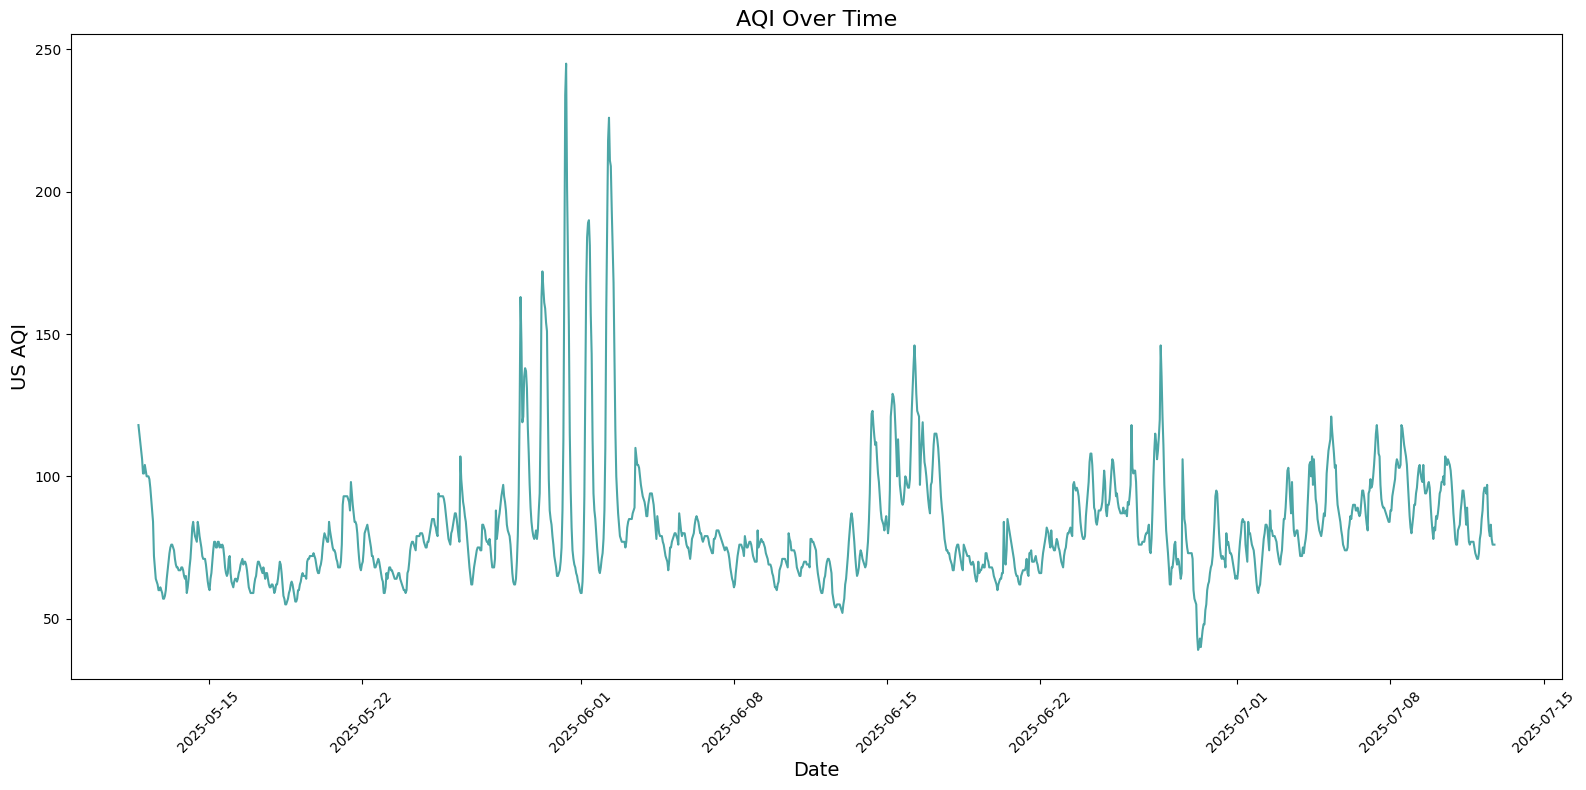

In [ ]:
# Time series plot of AQI
plt.figure(figsize=(16, 8))
plt.plot(df['date'], df['us_aqi'], color='teal', alpha=0.7)
plt.title('AQI Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('US AQI', fontsize=14)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

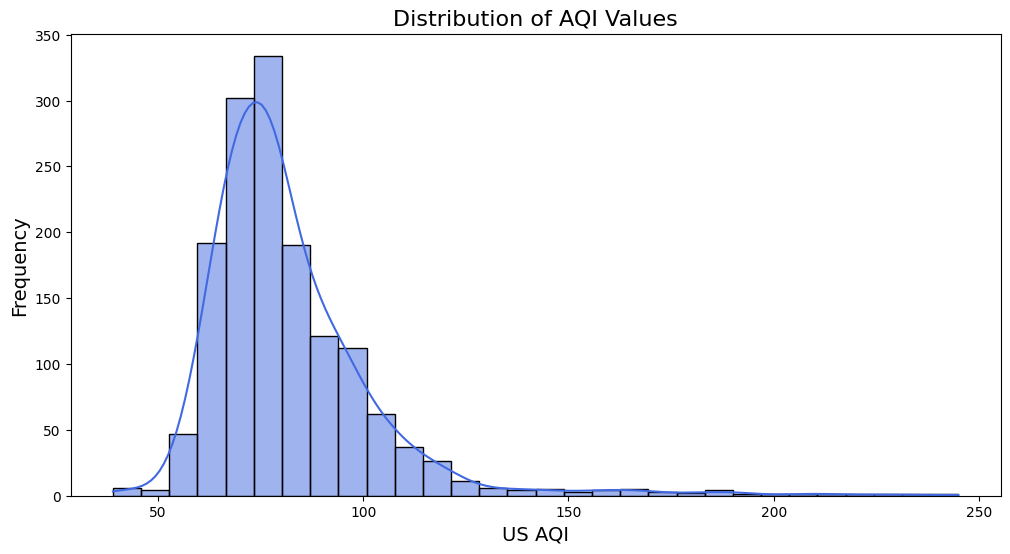

In [ ]:
# Distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(df['us_aqi'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of AQI Values', fontsize=16)
plt.xlabel('US AQI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


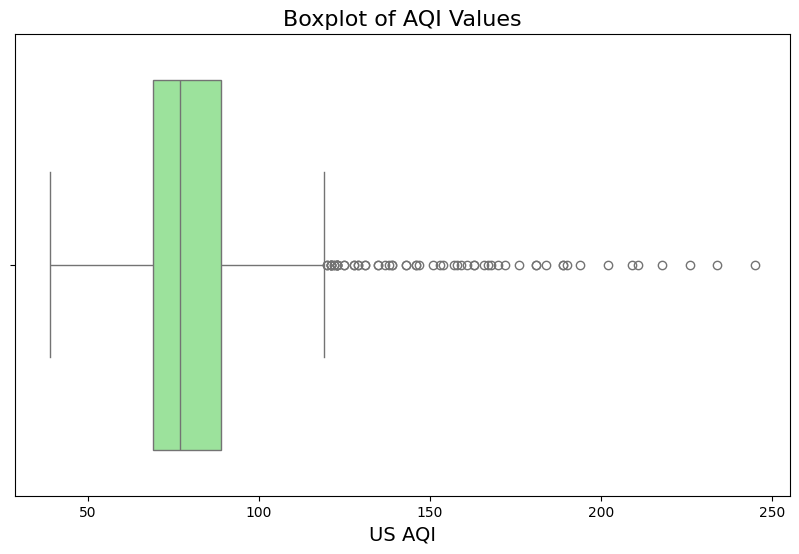

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['us_aqi'], color='lightgreen')
plt.title('Boxplot of AQI Values', fontsize=16)
plt.xlabel('US AQI', fontsize=14)
plt.show()

In [ ]:
# Set style for plots
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Basic statistics
aqi_stats = df['us_aqi'].describe()
print("AQI Statistics:")
print(aqi_stats)


AQI Statistics:
count    1488.000000
mean       82.071909
std        21.267871
min        39.000000
25%        69.000000
50%        77.000000
75%        89.000000
max       245.000000
Name: us_aqi, dtype: float64


<Figure size 1200x600 with 0 Axes>

In [ ]:
# AQI Categories function
def aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# Add AQI category column
df['aqi_category'] = df['us_aqi'].apply(aqi_category)

In [ ]:
df['aqi_category'].head()

,aqi_category
0,Unhealthy for Sensitive Groups
1,Unhealthy for Sensitive Groups
2,Unhealthy for Sensitive Groups
3,Unhealthy for Sensitive Groups
4,Unhealthy for Sensitive Groups


/tmp/ipython-input-16-1184822429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='aqi_category', data=df, order=category_counts.index,


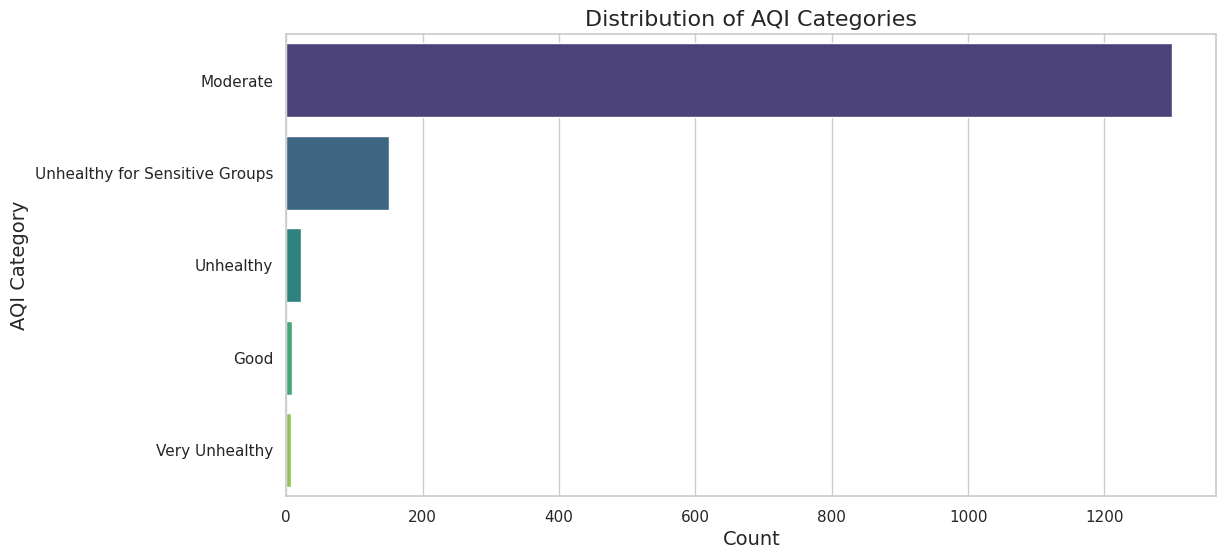

In [ ]:
# AQI Category distribution
category_counts = df['aqi_category'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(y='aqi_category', data=df, order=category_counts.index,
              palette='viridis')
plt.title('Distribution of AQI Categories', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('AQI Category', fontsize=14)
plt.show()



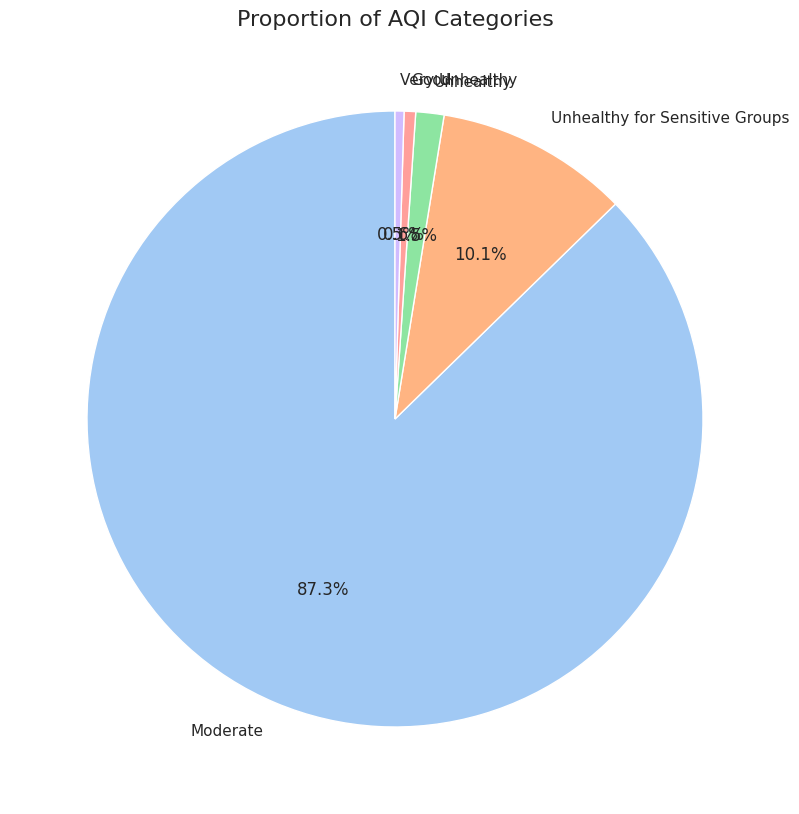

In [ ]:
# Pie chart of AQI categories
plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette('pastel'), startangle=90)
plt.title('Proportion of AQI Categories', fontsize=16)
plt.show()

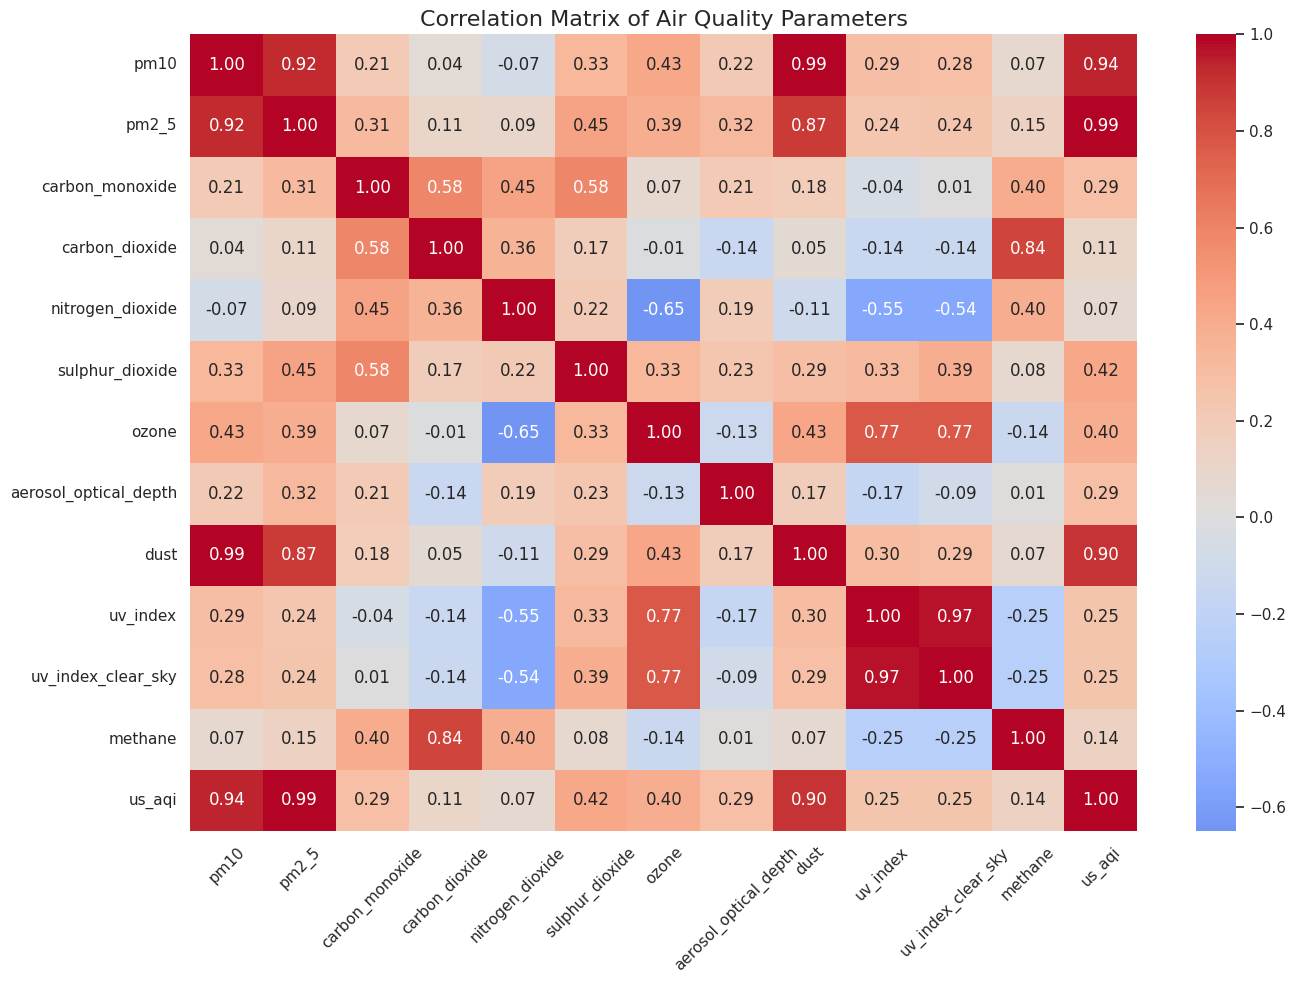

In [ ]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr_matrix = df.drop(columns=['index', 'date','aqi_category']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Air Quality Parameters', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


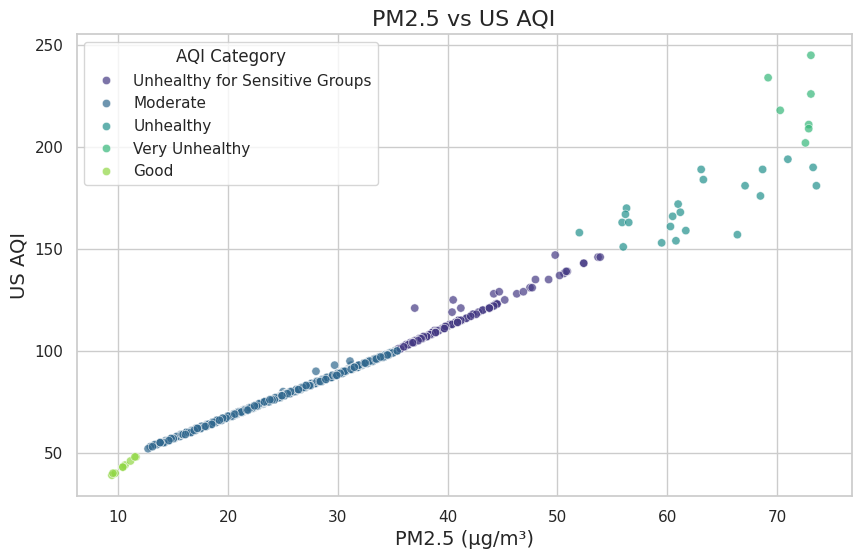

In [ ]:
# Scatter plot of PM2.5 vs AQI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pm2_5', y='us_aqi', data=df, hue='aqi_category',
                palette='viridis', alpha=0.7)
plt.title('PM2.5 vs US AQI', fontsize=16)
plt.xlabel('PM2.5 (µg/m³)', fontsize=14)
plt.ylabel('US AQI', fontsize=14)
plt.legend(title='AQI Category')
plt.show()

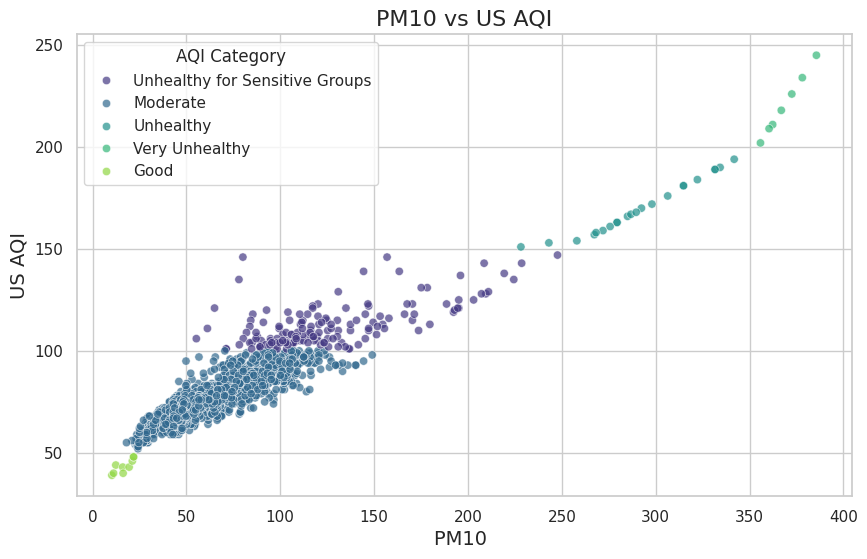

In [ ]:
# Scatter plot of PM10 vs AQI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pm10', y='us_aqi', data=df, hue='aqi_category',
                palette='viridis', alpha=0.7)
plt.title('PM10 vs US AQI', fontsize=16)
plt.xlabel('PM10 ', fontsize=14)
plt.ylabel('US AQI', fontsize=14)
plt.legend(title='AQI Category')
plt.show()

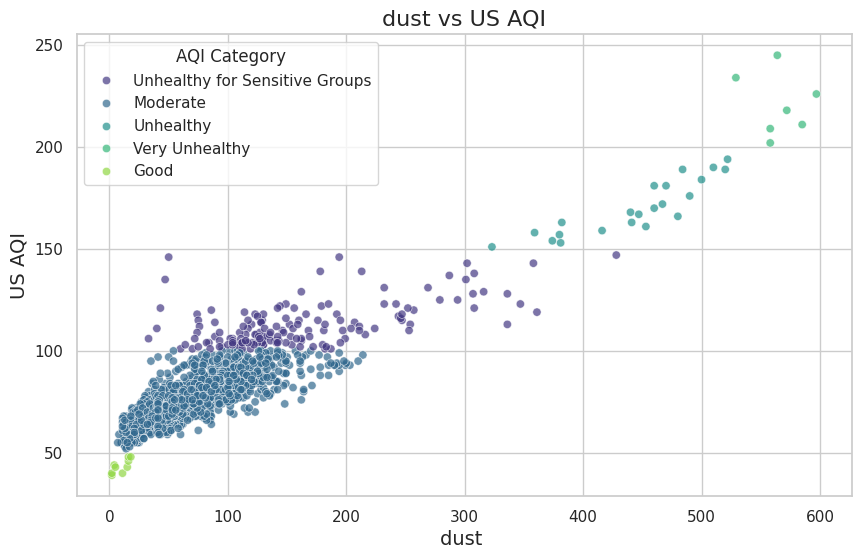

In [ ]:
# Scatter plot of dust vs AQI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dust', y='us_aqi', data=df, hue='aqi_category',
                palette='viridis', alpha=0.7)
plt.title('dust vs US AQI', fontsize=16)
plt.xlabel('dust ', fontsize=14)
plt.ylabel('US AQI', fontsize=14)
plt.legend(title='AQI Category')
plt.show()

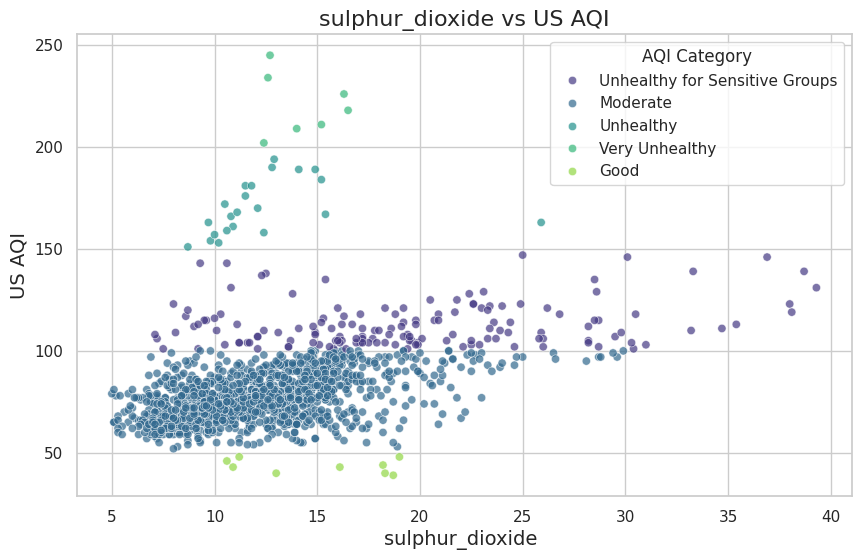

In [ ]:
# Scatter plot of PM2.5 vs AQI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sulphur_dioxide', y='us_aqi', data=df, hue='aqi_category',
                palette='viridis', alpha=0.7)
plt.title('sulphur_dioxide vs US AQI', fontsize=16)
plt.xlabel('sulphur_dioxide ', fontsize=14)
plt.ylabel('US AQI', fontsize=14)
plt.legend(title='AQI Category')
plt.show()

In [ ]:
df.columns

Index(['date', 'pm10', 'pm2_5', 'carbon_monoxide', 'carbon_dioxide',
       'nitrogen_dioxide', 'sulphur_dioxide', 'ozone', 'aerosol_optical_depth',
       'dust', 'uv_index', 'uv_index_clear_sky', 'methane', 'index', 'us_aqi',
       'aqi_category'],
      dtype='object')

/tmp/ipython-input-24-1296912148.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour', y='us_aqi', data=df, ci=None, color='purple')


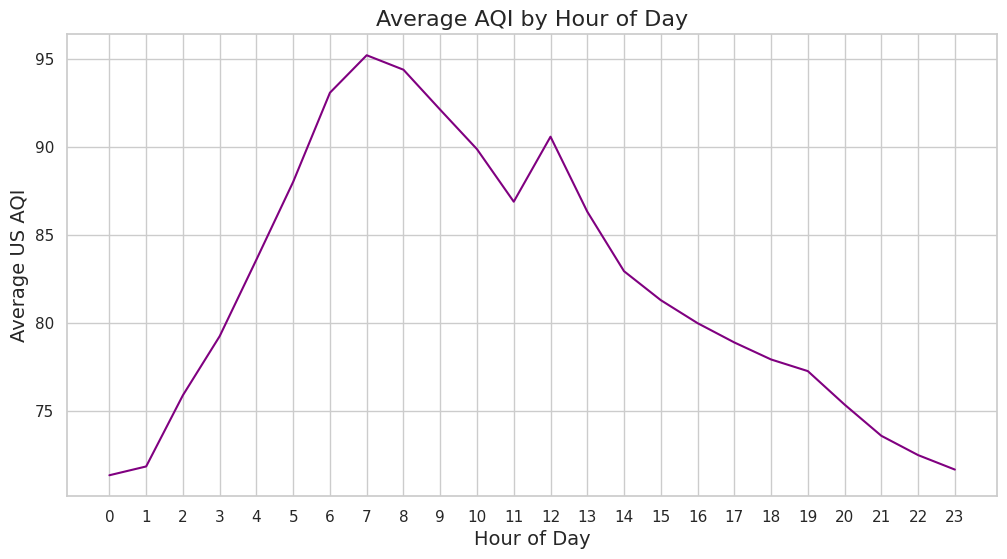

In [ ]:
# Extract hour from datetime
df['hour'] = df['date'].dt.hour

# AQI by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='us_aqi', data=df, ci=None, color='purple')
plt.title('Average AQI by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average US AQI', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

/tmp/ipython-input-25-4192845860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='us_aqi', data=df, palette='coolwarm')


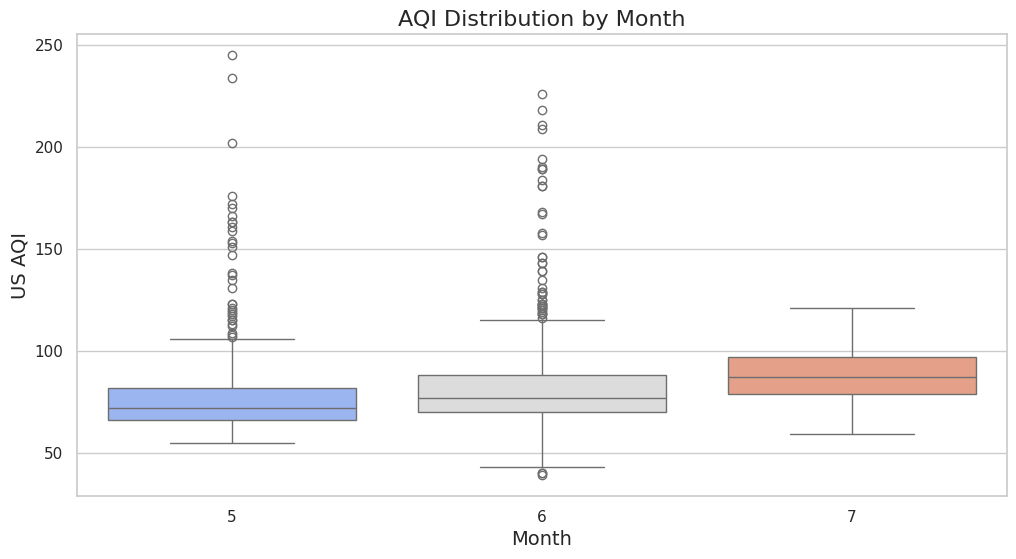

In [ ]:
# Extract month from datetime
df['month'] = df['date'].dt.month

# AQI by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='us_aqi', data=df, palette='coolwarm')
plt.title('AQI Distribution by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('US AQI', fontsize=14)
plt.show()

In [ ]:
import pandas as pd

# Select features and target
selected_features = ['pm10', 'carbon_monoxide', 'sulphur_dioxide',
                    'dust', 'aerosol_optical_depth', 'ozone', 'us_aqi']

# Create new DataFrame with selected columns
new_df = df[selected_features].copy()

# Display the first 5 rows
print(new_df.head())

   pm10  carbon_monoxide  sulphur_dioxide  dust  aerosol_optical_depth  ozone  \
0  85.4            210.0             10.3  74.0                   0.64   60.0   
1  84.3            189.0              9.6  75.0                   0.61   64.0   
2  83.8            175.0              9.0  76.0                   0.58   67.0   
3  82.0            169.0              8.1  74.0                   0.57   68.0   
4  80.3            169.0              7.2  72.0                   0.57   68.0   

   us_aqi  
0     118  
1     115  
2     112  
3     109  
4     106  


# **FEATURE SELECTION**

In [ ]:
# Save to current working directory (in Colab's temporary storage)
new_df.to_csv("selFeatures_aqi.csv",index=False)  # index=False avoids saving row numbers
print("CSV saved successfully!")

CSV saved successfully!


In [ ]:
import pandas as pd
df=pd.read_csv('/content/selFeatures_aqi.csv')
df.head()

,pm10,carbon_monoxide,sulphur_dioxide,dust,aerosol_optical_depth,ozone,us_aqi
0,85.4,210.0,10.3,74.0,0.64,60.0,118
1,84.3,189.0,9.6,75.0,0.61,64.0,115
2,83.8,175.0,9.0,76.0,0.58,67.0,112
3,82.0,169.0,8.1,74.0,0.57,68.0,109
4,80.3,169.0,7.2,72.0,0.57,68.0,106


In [ ]:
# Select features and target
X = df[['pm10', 'carbon_monoxide','sulphur_dioxide','dust','aerosol_optical_depth', 'ozone']]
y = df['us_aqi']

# **SPLITING DATA**

In [ ]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train/test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaling for test data

# **MODEL IMPLEMENTATION AND EVALUTION**

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on test data
y_pred = model.predict(X_test_scaled)

print("=== Linear Regression ===")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

=== Linear Regression ===
MSE: 26.54
RMSE: 5.15
MAE: 3.61
R²: 0.9082


In [ ]:
# Get coefficients (importance of each feature)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

                 Feature  Coefficient
0                   pm10    51.418977
1        carbon_monoxide     0.942505
5                  ozone     0.503917
2        sulphur_dioxide     0.371458
4  aerosol_optical_depth     0.334914
3                   dust   -31.428555


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
from sklearn.linear_model import Lasso

# Initialize and train
lasso = Lasso(alpha=0.1)  # Regularization strength
lasso.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = lasso.predict(X_test_scaled)
print("=== Lasso Regression ===")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

=== Lasso Regression ===
MSE: 26.32
RMSE: 5.13
MAE: 3.75
R²: 0.9090


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train
dtree = DecisionTreeRegressor(max_depth=5, random_state=42)
dtree.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = dtree.predict(X_test_scaled)
print("\n=== Decision Tree ===")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")


=== Decision Tree ===
MSE: 39.54
RMSE: 6.29
MAE: 4.66
R²: 0.8633


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
print("\n=== KNN Regressor ===")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")


=== KNN Regressor ===
MSE: 22.32
RMSE: 4.72
MAE: 3.55
R²: 0.9228


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test_scaled)
print("\n=== Random Forest ===")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")


=== Random Forest ===
MSE: 15.83
RMSE: 3.98
MAE: 2.76
R²: 0.9452


In [ ]:
from xgboost import XGBRegressor

# Initialize and train
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = xgb.predict(X_test_scaled)
print("\n=== XGBoost ===")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")


=== XGBoost ===
MSE: 15.12
RMSE: 3.89
MAE: 2.62
R²: 0.9477


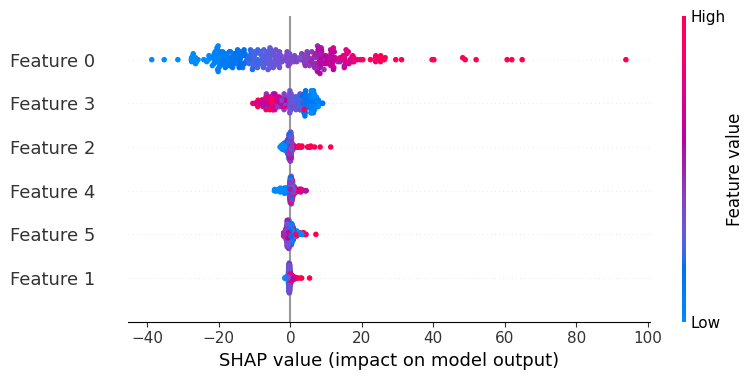

In [ ]:
import shap

# Initialize SHAP explainer for XGBoost
explainer = shap.Explainer(xgb, X_train_scaled)
# Calculate SHAP values for the test set
shap_values = explainer(X_test_scaled)
# Generate a summary plot
shap.summary_plot(shap_values, X_test_scaled)

In [ ]:
# Visualize SHAP values for a single prediction
shap.initjs()  # Required for interactive visualization in notebooks

# Choose an index for the test instance
index = 0
# Generate a force plot for the first test instance
shap.force_plot(explainer.expected_value, shap_values[index].values, X_test.iloc[index])

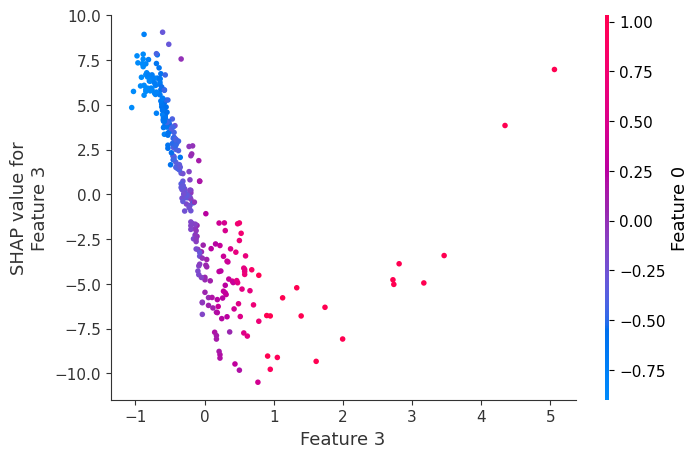

In [ ]:
# Plot dependence for a specific feature (e.g., 'Dust')
shap.dependence_plot('Feature 3', shap_values.values, X_test_scaled)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=17ed257104072afa478a245d91af59e5d0c34529af0072ae721721d99870137e
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

# Initialize the LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=X_train.columns.tolist(),
    class_names=['us_aqi'],
    verbose=True,
    mode='regression'
)
# Choose an instance to explain
i = 0
# Generate LIME explanation for the i-th test instance
exp = explainer_lime.explain_instance(X_test_scaled[i], xgb.predict)
# Show the LIME explanation in text form
exp.show_in_notebook(show_table=True)

Intercept 84.87063377692391
Prediction_local [89.90149554]
Right: 79.426155


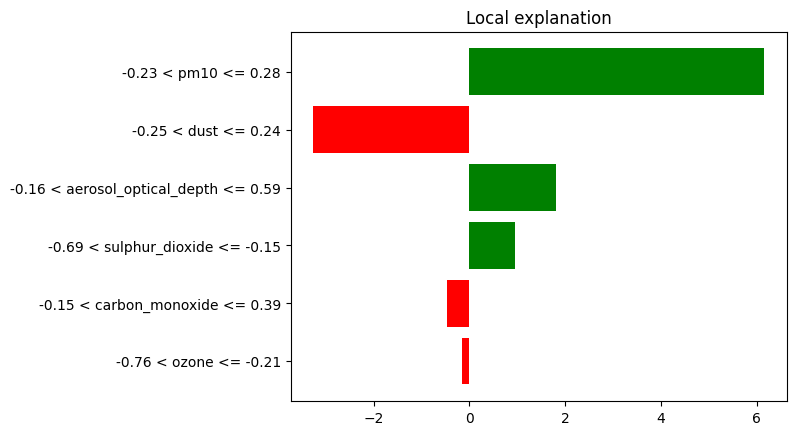

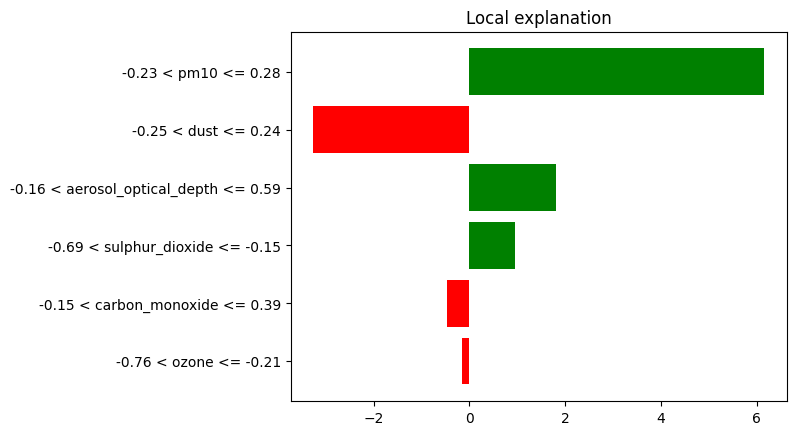

In [ ]:
# Display the LIME explanation graphically
exp.as_pyplot_figure()

In [ ]:
# Save model
xgb.save_model('xgb_scaled_model.json')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=8,
                    validation_split=0.2, verbose=0)

# Predict and evaluate
y_pred = model.predict(X_test_scaled).flatten()
print("\n=== ANN ===")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

=== ANN ===
MSE: 23.59
RMSE: 4.86
MAE: 3.44
R²: 0.9184
